In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math

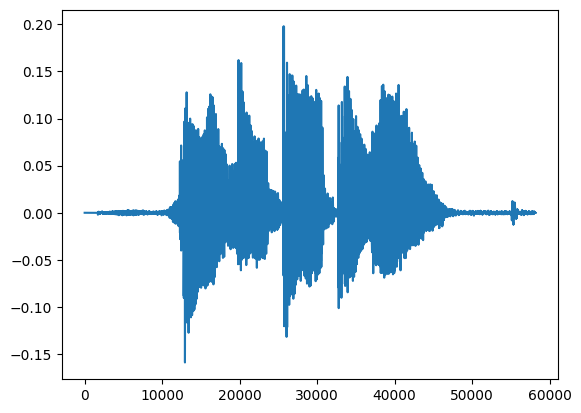

In [58]:
import librosa
noise, sr = librosa.load("/content/WhiteNoise.wav")
noise=noise[:58176]
signal, sr = librosa.load("/content/AudioSignal.wav")
signalnoise, sr = librosa.load("/content/Signal_WhiteNoise.wav")
plt.plot(signal)


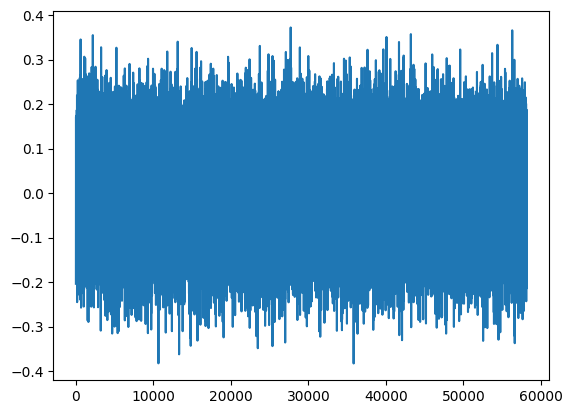

In [59]:
plt.plot(noise)

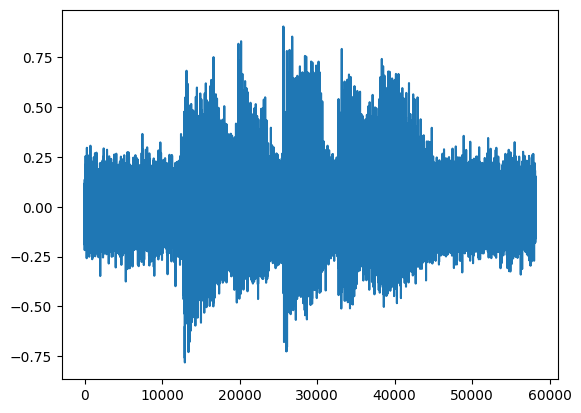

In [60]:
plt.plot(signalnoise)

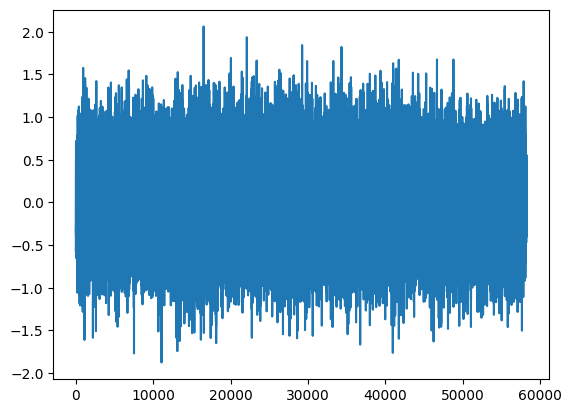

In [61]:
import numpy as np

def wiener_filter(signal, reference, num_coefficients):

    # Compute cross-correlation between signal and reference
    cross_corr = np.correlate(reference, signal, mode='full')

    # Compute autocorrelation of reference
    auto_corr_ref = np.correlate(reference, reference, mode='full')

    # Compute Wiener filter coefficients using least squares
    R = np.vstack([auto_corr_ref[i:i+num_coefficients] for i in range(num_coefficients)])
    p = cross_corr[:num_coefficients]
    # filter_coefficients = np.linalg.lstsq(np.linalg.inv(R), p, rcond=None)[0]
    filter_coefficients = np.dot(np.linalg.inv(R), p)

    return filter_coefficients

signal3=signalnoise
reference3=noise
num_coefficients =100
filter_coefficients = wiener_filter(signal3, reference3, num_coefficients)


filteredsignal = np.convolve(noise, filter_coefficients, mode='full')


signalnoise = np.pad(signalnoise, (0, (num_coefficients-1)), mode='constant', constant_values=0)
errorsignal=(signalnoise-filteredsignal)

plt.plot(errorsignal)

In [62]:

from scipy.io.wavfile import write
write("nois.wav",sr, errorsignal)
